# Task 1


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
img=cv2.imread('wall.jpg')

In [45]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

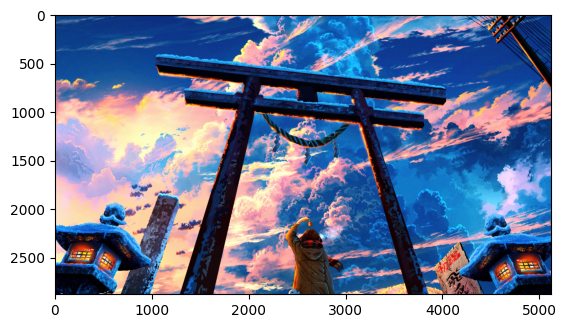

In [46]:
plt.imshow(rgb_img)

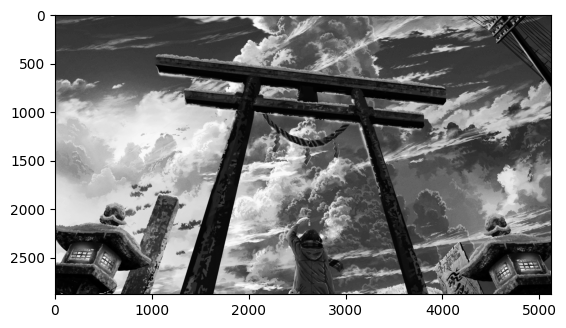

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

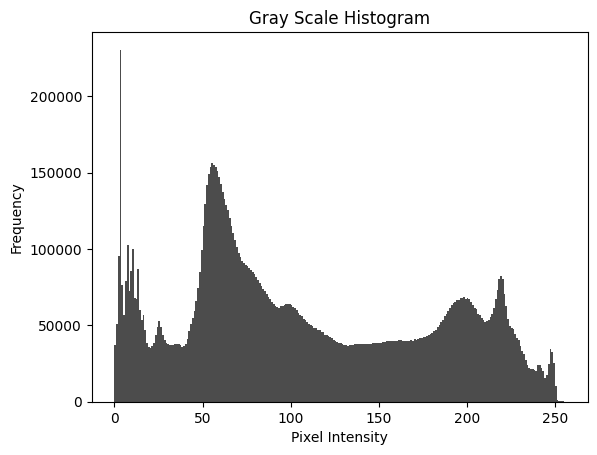

In [48]:


plt.hist(gray.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title('Gray Scale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

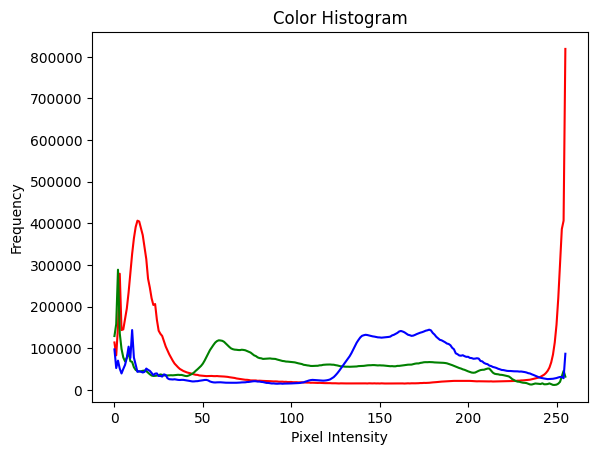

In [49]:
colors = ( 'r', 'g','b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([rgb_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

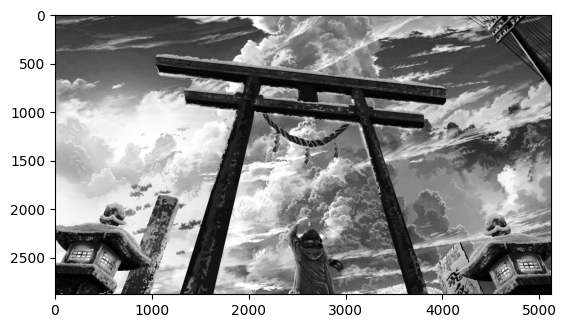

In [50]:
equalized_image = cv2.equalizeHist(gray)
plt.imshow(equalized_image, cmap='gray')

# Task 2 Discrete Fourier Transform (FFT) and Inverse FFT (IFFT)


In [51]:
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

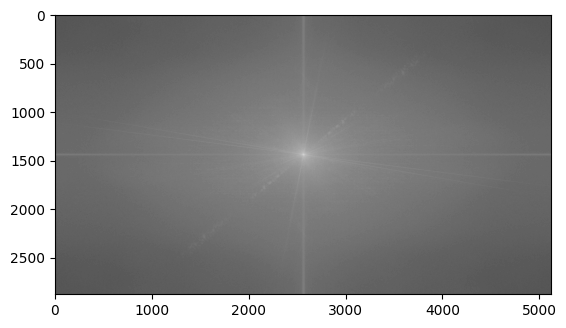

In [52]:
magnitude_spec = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.imshow(magnitude_spec, cmap='gray')

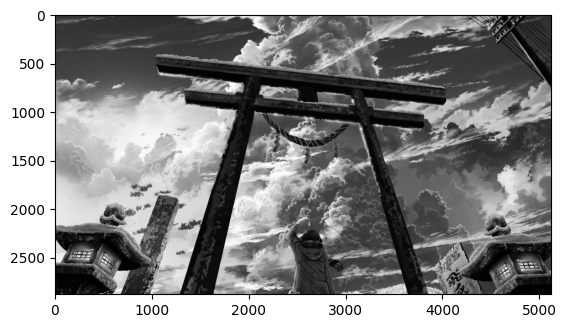

In [53]:
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
plt.imshow(img_back, cmap='gray')

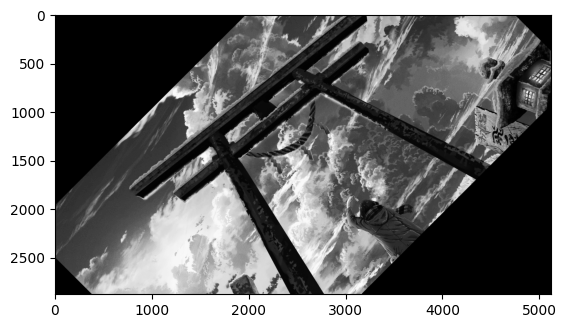

In [54]:
(h, w) = gray.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray, rotation_matrix, (w, h))
plt.imshow(rotated_image, cmap='gray')

In [55]:
dft_rotated = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift_rotated = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(cv2.magnitude(dft_shift_rotated[:,:,0], dft_shift_rotated[:,:,1]))

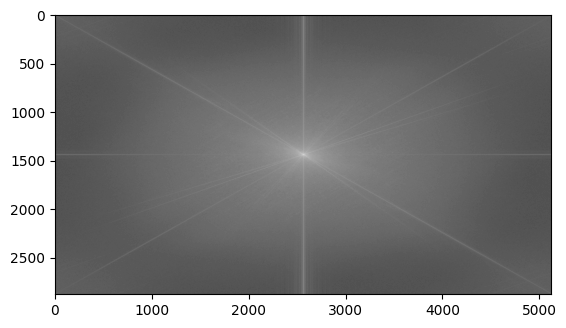

In [56]:
plt.imshow( magnitude_spectrum_rotated, cmap='gray')